In [ ]:
# 필요한 패키지 로드

In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [38]:
# 데이터 로드
df1= pd.read_csv('서울경기.csv',encoding='cp949')

In [39]:
df1.columns

Index(['field_1', '_', '인덱스', '업체명', '확인유형', '시', '구', '시군구', '주생산품', '확인기관',
       '개인법인구', '업력_공통', '제조업여부', 'A16_KSIC코', '글로벌지수', '종사자_지', 'X4차산업혁',
       'growth_지', '주소', 'X', 'Y', 'CLSS', 'PNU', '주소구분', '표준신주소', '표준구주소',
       '우편번호', '군집'],
      dtype='object')

In [40]:
# 필요 데이터 추출
df=df1.loc[:,['글로벌지수','종사자_지','X4차산업혁','growth_지','X','Y']]

In [41]:
df

,글로벌지수,종사자_지,X4차산업혁,growth_지,X,Y
0,19.108280,456.682625,11.323023,47.379240,316512,549801
1,11.923567,287.090360,13.069958,217.741280,316647,516944
2,6.668790,615.498902,9.774421,29.928364,323381,578852
3,-92.866242,319.601909,11.717686,-27.158980,316756,546179
4,9.554140,301.466717,8.780752,118.273730,312393,552005
...,...,...,...,...,...,...
3210,0.000000,708.975100,12.861610,-97.448020,322334,528425
3211,846.286600,244.025000,12.188480,198.115400,313891,551927
3212,9.554140,16.401680,13.430560,196.850900,328138,550147
3213,11.923570,322.002200,10.391460,212.049500,301850,544308


## 정규화

### RobustScaler

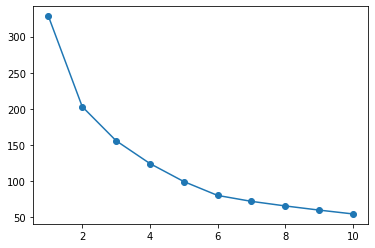

In [42]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robustdata = scaler.fit_transform(df)


#elbow method
kmlist = []
for i in range(1,11):
    km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
    km.fit(minmaxdata)
    
    kmlist.append(km.inertia_)
plt.plot(range(1,11), kmlist, marker='o')
# 군집 중심에서 각 클러스터 내 점 거리 합산
plt.show()

In [43]:
# 실루엣 분석 평가 지표값을 구하기 위한 API 추가

from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.metrics.cluster import silhouette_score

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('실루엣 계수')
    plt.show()

# 로버스트 k=3

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49892 missing from current

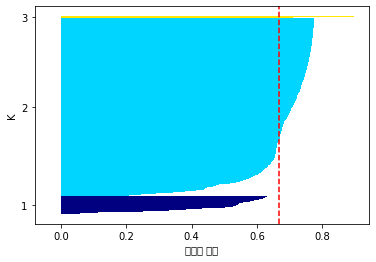

벤처기업 지수 데이터 세트 Silhouette Analysis Score:0.666


,글로벌지수,종사자_지,X4차산업혁,growth_지,X,Y,silhouette_coeff
0,19.108280,456.682625,11.323023,47.379240,316512,549801,0.666392
1,11.923567,287.090360,13.069958,217.741280,316647,516944,0.666392
2,6.668790,615.498902,9.774421,29.928364,323381,578852,0.666392


In [44]:
k=3

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(robustdata)
dataR_pca=pca.transform(robustdata)
pca.explained_variance_ratio_
dataR_pca.shape

km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(dataR_pca)
plotSilhouette(dataR_pca, y_km)

#모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_score(dataR_pca,y_km)

df['silhouette_coeff']=score_samples
#모든 데이터의 평균 실루엣 계수 값을 궇마
average_score=silhouette_score(dataR_pca,y_km)
print('벤처기업 지수 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
df.head(3)

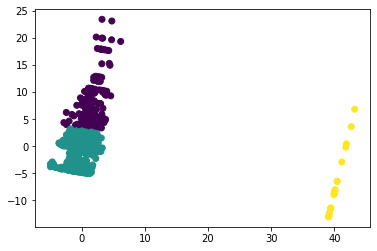

In [45]:
plt.scatter(dataR_pca[:,0],dataR_pca[:,1],c=km.labels_)

# 로버스트 k=4

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49892 missing from current

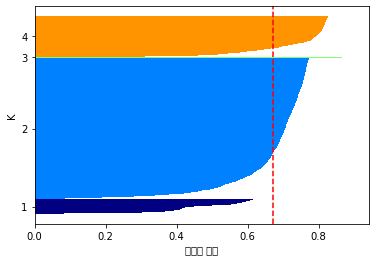

벤처기업 지수 데이터 세트 Silhouette Analysis Score:0.671


,글로벌지수,종사자_지,X4차산업혁,growth_지,X,Y,silhouette_coeff
0,19.108280,456.682625,11.323023,47.379240,316512,549801,0.671224
1,11.923567,287.090360,13.069958,217.741280,316647,516944,0.671224
2,6.668790,615.498902,9.774421,29.928364,323381,578852,0.671224


In [46]:
k=4

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(robustdata)
dataR_pca=pca.transform(robustdata)
pca.explained_variance_ratio_
dataR_pca.shape

km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(dataR_pca)
plotSilhouette(dataR_pca, y_km)

#모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_score(dataR_pca,y_km)

df['silhouette_coeff']=score_samples
#모든 데이터의 평균 실루엣 계수 값을 궇마
average_score=silhouette_score(dataR_pca,y_km)
print('벤처기업 지수 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
df.head(3)

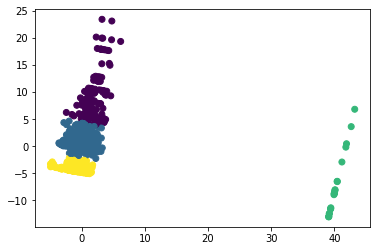

In [47]:
plt.scatter(dataR_pca[:,0],dataR_pca[:,1],c=km.labels_)

# 로버스트 k=5

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49892 missing from current

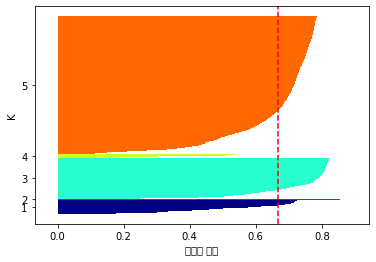

벤처기업 지수 데이터 세트 Silhouette Analysis Score:0.668


,글로벌지수,종사자_지,X4차산업혁,growth_지,X,Y,silhouette_coeff
0,19.108280,456.682625,11.323023,47.379240,316512,549801,0.667823
1,11.923567,287.090360,13.069958,217.741280,316647,516944,0.667823
2,6.668790,615.498902,9.774421,29.928364,323381,578852,0.667823


In [57]:
k=5

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(robustdata)
dataR_pca=pca.transform(robustdata)
pca.explained_variance_ratio_
dataR_pca.shape

km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(dataR_pca)
plotSilhouette(dataR_pca, y_km)

#모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_score(dataR_pca,y_km)

df['silhouette_coeff']=score_samples
#모든 데이터의 평균 실루엣 계수 값을 궇마
average_score=silhouette_score(dataR_pca,y_km)
print('벤처기업 지수 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
df.head(3)

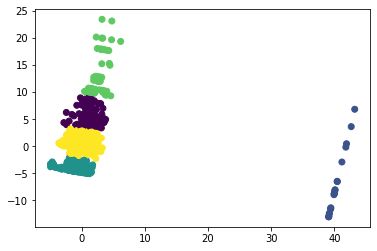

In [58]:
plt.scatter(dataR_pca[:,0],dataR_pca[:,1],c=km.labels_)

### MinMaxScaler

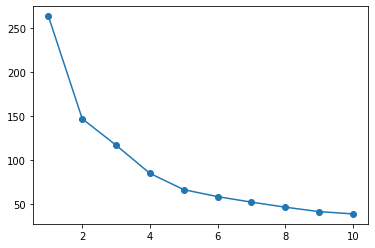

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
minmaxdata= scaler.fit_transform(df)

#elbow method
kmlist = []
for i in range(1,11):
    km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
    km.fit(minmaxdata)
    
    kmlist.append(km.inertia_)
plt.plot(range(1,11), kmlist, marker='o')
# 군집 중심에서 각 클러스터 내 점 거리 합산
plt.show()

# 민맥스 k=3

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49892 missing from current

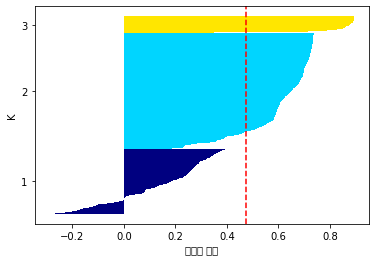

벤처기업 지수 데이터 세트 Silhouette Analysis Score:0.476


,글로벌지수,종사자_지,X4차산업혁,growth_지,X,Y,silhouette_coeff
0,19.108280,456.682625,11.323023,47.379240,316512,549801,0.475527
1,11.923567,287.090360,13.069958,217.741280,316647,516944,0.475527
2,6.668790,615.498902,9.774421,29.928364,323381,578852,0.475527


In [51]:
k=3

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(minmaxdata)
dataR_pca=pca.transform(minmaxdata)
pca.explained_variance_ratio_
dataR_pca.shape

km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(dataR_pca)
plotSilhouette(dataR_pca, y_km)

#모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_score(dataR_pca,y_km)

df['silhouette_coeff']=score_samples
#모든 데이터의 평균 실루엣 계수 값을 궇마
average_score=silhouette_score(dataR_pca,y_km)
print('벤처기업 지수 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
df.head(3)

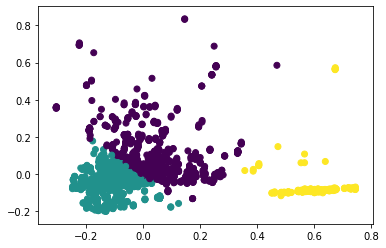

In [52]:
plt.scatter(dataR_pca[:,0],dataR_pca[:,1],c=km.labels_)

# (결정)민맥스 k=4

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49892 missing from current

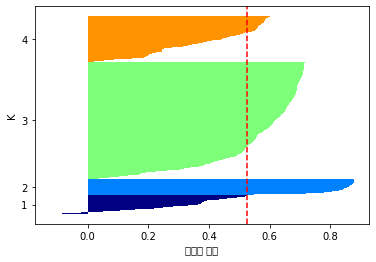

벤처기업 지수 데이터 세트 Silhouette Analysis Score:0.525


,글로벌지수,종사자_지,X4차산업혁,growth_지,X,Y,silhouette_coeff
0,19.108280,456.682625,11.323023,47.379240,316512,549801,0.524666
1,11.923567,287.090360,13.069958,217.741280,316647,516944,0.524666
2,6.668790,615.498902,9.774421,29.928364,323381,578852,0.524666


In [53]:
k=4

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(minmaxdata)
dataR_pca=pca.transform(minmaxdata)
pca.explained_variance_ratio_
dataR_pca.shape

km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(dataR_pca)
plotSilhouette(dataR_pca, y_km)

#모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_score(dataR_pca,y_km)

df['silhouette_coeff']=score_samples
#모든 데이터의 평균 실루엣 계수 값을 궇마
average_score=silhouette_score(dataR_pca,y_km)
print('벤처기업 지수 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
df.head(3)

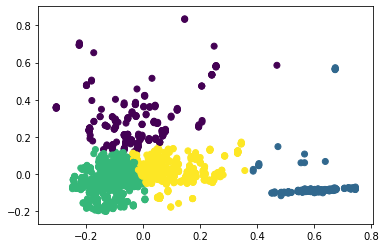

In [54]:
plt.scatter(dataR_pca[:,0],dataR_pca[:,1],c=km.labels_)

# 민맥스 k=5

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49892 missing from current

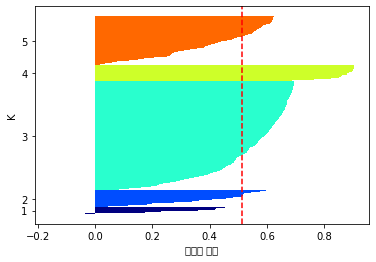

벤처기업 지수 데이터 세트 Silhouette Analysis Score:0.514


,글로벌지수,종사자_지,X4차산업혁,growth_지,X,Y,silhouette_coeff
0,19.108280,456.682625,11.323023,47.379240,316512,549801,0.513961
1,11.923567,287.090360,13.069958,217.741280,316647,516944,0.513961
2,6.668790,615.498902,9.774421,29.928364,323381,578852,0.513961


In [55]:
k=5

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(minmaxdata)
dataR_pca=pca.transform(minmaxdata)
pca.explained_variance_ratio_
dataR_pca.shape

km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(dataR_pca)
plotSilhouette(dataR_pca, y_km)

#모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_score(dataR_pca,y_km)

df['silhouette_coeff']=score_samples
#모든 데이터의 평균 실루엣 계수 값을 궇마
average_score=silhouette_score(dataR_pca,y_km)
print('벤처기업 지수 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
df.head(3)

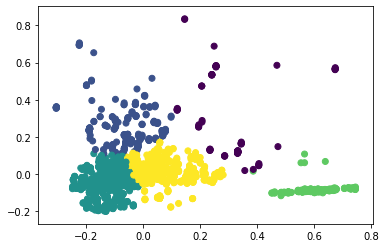

In [56]:
plt.scatter(dataR_pca[:,0],dataR_pca[:,1],c=km.labels_)

# StandardScaler

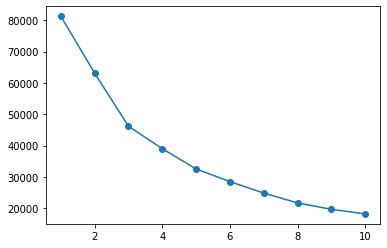

In [30]:
from sklearn.preprocessing import StandardScaler
scalerZ = StandardScaler()
Zdata = scalerZ.fit_transform(df)

#elbow method
kmlist = []
for i in range(1,11):
    km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
    km.fit(Zdata)
    
    kmlist.append(km.inertia_)
plt.plot(range(1,11), kmlist, marker='o')
# 군집 중심에서 각 클러스터 내 점 거리 합산
plt.show()

In [ ]:
# 

In [59]:
pca.components_

array([[ 0.0259843 ,  0.20187619,  0.00757169, -0.02726934, -0.47249445,
        -0.85704076],
       [ 0.07672339,  0.96902057,  0.06890703, -0.09102473,  0.10552861,
         0.17590532]])

In [60]:
km.labels_

array([4, 4, 0, ..., 2, 4, 2])

In [61]:
data=pd.read_csv('서울경기.csv',encoding='cp949')

In [62]:
data['군집']=km.labels_

In [63]:
data.to_csv('주은주은(로버스트_5).csv',encoding='cp949')

In [66]:
data=pd.read_csv('주은주은(로버스트_5).csv',encoding='cp949')

In [67]:
data

,Unnamed: 0,field_1,_,인덱스,업체명,확인유형,시,구,시군구,주생산품,...,주소,X,Y,CLSS,PNU,주소구분,표준신주소,표준구주소,우편번호,군집
0,0,0,0,0,(1)서울디지털인쇄협동조합,기술평가대출기업(중진공),서울,성동구,서울 성동구,인쇄서비스 및 문구류,...,서울특별시 성동구 성수2가3동 성수일로10길 26 하우스디세종타워,316512,549801,정좌표,공개용버전 미지원,새주소,미지원,미지원,4793.0,4
1,1,1,1,1,(유한)블렉스,기술평가보증기업(기술보증기금),서울,강남구,서울 강남구,블럭체인 스마트 컨트랙트 기반 메신저,...,경기도 수원시 영통구 신동 350,316647,516944,정좌표,공개용버전 미지원,구주소,미지원,미지원,16679.0,4
2,2,2,2,2,(유한)스템메디케어,연구개발기업,서울,강남구,서울 강남구,화장품 원료 치료용 의약품,...,경기도 포천시 소흘읍 이동교리 248-2,323381,578852,정좌표,공개용버전 미지원,구주소,미지원,미지원,11184.0,0
3,3,3,3,3,(유한)씨비트레이딩,벤처투자기업(창투사등이 자본금 10%이상 투자),서울,성동구,서울 성동구,트레이딩 소프트웨어,...,서울특별시 강남구 삼성동,316756,546179,법정동 좌표,공개용버전 미지원,판별불가,미지원,미지원,NaN,4
4,4,4,4,4,(유한)아홉,기술평가보증기업(기술보증기금),서울,중구,서울 중구,보안 솔루션,...,서울특별시 중구 을지로 252-1,312393,552005,정좌표,공개용버전 미지원,새주소,미지원,미지원,4561.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,3210,3477,3477,3477,(주)옵토마인드,기술평가보증기업(기술보증기금),경기도,수원시,경기도 수원시,Active Optical Cable,...,"경기도 성남시 분당구 돌마로 172 KR 서울대학교 헬스케어혁신파크 6층, 1층",322334,528425,정좌표,공개용버전 미지원,새주소,미지원,미지원,13605.0,0
3211,3211,3478,3478,3478,(주)옵티마이즈,기술평가보증기업(기술보증기금),서울,노원구,서울 노원구,여행 플랫폼 어플,...,"서울특별시 중구 황학동 퇴계로 461, 801 2호",313891,551927,정좌표,공개용버전 미지원,새주소,미지원,미지원,4575.0,4
3212,3212,3479,3479,3479,(주)옵티멀,기술평가보증기업(기술보증기금),경기도,성남시,경기도 성남시,영상 송수신기 키보드 수신장치,...,경기도 하남시 조정대로 45 F430호,328138,550147,정좌표,공개용버전 미지원,새주소,미지원,미지원,12918.0,2
3213,3213,3480,3480,3480,(주)옷딜,기술평가보증기업(기술보증기금),서울,강남구,서울 강남구,의류관련 쇼핑앱 서비스 의류정보 관련 웹 및 어플 등,...,구로동 212-1번지 9층 구로구 서울특별시 KR,301850,544308,시군구 좌표,공개용버전 미지원,판별불가,미지원,미지원,NaN,4


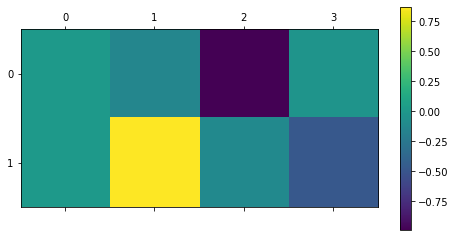

In [80]:
plt.matshow(pca.components_,cmap='viridis')
plt.colorbar()

# 지도에 시각화

In [104]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins

In [105]:
import json

In [106]:
with open('서울경기도시군구.geojson') as json_file:
    json_data = json.load(json_file)


In [107]:
json_data

{'type': 'FeatureCollection',
 'bbox': [157699.76121274623,
  377229.8525944295,
  275058.4421725517,
  531319.6642612049],
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[200998.57929429767, 447646.4183084718],
      [201076.0079407961, 447730.0272701966],
      [201158.39294396728, 447853.1379823811],
      [201217.59956934437, 447934.5685983837],
      [201258.09679930488, 448005.2887976445],
      [201335.60249787182, 448108.09966012044],
      [201440.22702293505, 448236.09098405653],
      [201484.915157117, 448275.3817769712],
      [201562.42178155723, 448348.063085179],
      [201574.62111957665, 448363.753228252],
      [201660.6179992123, 448424.06498048996],
      [201775.8335292963, 448514.2771891074],
      [201804.34272982174, 448526.6278830778],
      [201888.3603739144, 448563.0199283853],
      [202019.69987295588, 448618.50571628835],
      [202088.22483522692, 448647.4548257432],
      [202230.76143846553, 448689.6785846713

In [108]:
center=[37.541,126.986]

In [109]:
m = folium.Map(location=center,zoom_start=10)

In [112]:
m

In [110]:
data

,업체명,확인유형,시,구,주생산품,확인기관,개인법인구분_공통,업력_공통,제조업여부_공통,A16_KSIC코드_공통,글로벌지수,종사자_지수,X4차산업혁명지수,growth_지수,군집
0,(1)서울디지털인쇄협동조합,기술평가대출기업(중진공),서울,성동구,인쇄서비스 및 문구류,중소벤처기업진흥공단,법인,17,2,M72122,19.108280,456.682625,11.323023,47.379240,2
1,(4)(유)팔도푸드,기술평가대출기업(중진공),서울,송파구,"건고추,깐양파,깐감자",중소벤처기업진흥공단,법인,22,2,J62021,215.847134,302.933534,9.343697,13.572476,1
2,(농업회사법인(주))주성,기술평가보증기업(기술보증기금),경기도,안성시,축산용 사료 기능성 건강식품,기술보증기금 기술평가센터,개인,7,1,C25932,5.961783,0.000000,3.738280,154.570550,3
3,(농업회사법인)주식회사 삼신후르츠,기술평가보증기업(기술보증기금),경기도,화성시,급식용 및 간식용 조각과일,기술보증기금 기술평가센터,법인,11,1,C26294,122.828025,304.487186,12.929722,167.288704,1
4,(사단법인)해오름장애인협회,기술평가대출기업(중진공),서울,성북구,"cctv, 영상/음향방송장비",중소벤처기업진흥공단,법인,2,2,J58222,-3.554140,306.667250,11.867938,215.372680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20317,히트러너(주),기술평가보증기업(기술보증기금),경기도,성남시,살충제 해충퇴치기 살균제,기술보증기금 기술평가센터,법인,13,2,M72129,246.324800,315.734800,11.717690,127.528700,1
20318,힌터,기술평가보증기업(기술보증기금),서울,용산구,플랫폼 개발,기술보증기금 기술평가센터,법인,18,2,G46510,176.350300,452.716300,10.221170,97.329800,2
20319,힐라리스(주),연구개발기업,서울,강남구,"FitLab, KiNEX, Advisor 개발",중소벤처기업진흥공단,법인,24,2,G46510,-99.343950,492.419600,10.663920,202.066700,3
20320,힐빙케어,기술평가대출기업(중진공),경기도,부천시,장애인 전동차 보조배터리,중소벤처기업진흥공단,법인,22,1,C29294,162.821700,325.069100,12.224540,86.147460,3


In [138]:
df1=pd.read_csv('데이터_군집3.csv',encoding='cp949')
df1

,업체명,확인유형,시,구,시군구,주생산품,확인기관,개인법인구분_공통,업력_공통,제조업여부_공통,A16_KSIC코드_공통,글로벌지수,종사자_지수,X4차산업혁명지수,growth_지수,군집
0,(1)서울디지털인쇄협동조합,기술평가대출기업(중진공),서울,성동구,서울 성동구,인쇄서비스 및 문구류,중소벤처기업진흥공단,법인,17,2,M72122,19.108280,456.682625,11.323023,47.379240,2
1,(4)(유)팔도푸드,기술평가대출기업(중진공),서울,송파구,서울 송파구,"건고추,깐양파,깐감자",중소벤처기업진흥공단,법인,22,2,J62021,215.847134,302.933534,9.343697,13.572476,1
2,(농업회사법인(주))주성,기술평가보증기업(기술보증기금),경기도,안성시,경기도 안성시,축산용 사료 기능성 건강식품,기술보증기금 기술평가센터,개인,7,1,C25932,5.961783,0.000000,3.738280,154.570550,3
3,(사단법인)해오름장애인협회,기술평가대출기업(중진공),서울,성북구,서울 성북구,"cctv, 영상/음향방송장비",중소벤처기업진흥공단,법인,2,2,J58222,-3.554140,306.667250,11.867938,215.372680,2
4,(유한)고고로보틱스,기술평가보증기업(기술보증기금),경기도,수원시,경기도 수원시,엔지니어링 서비스 자동화 소프트웨어 개발,기술보증기금 기술평가센터,법인,6,1,C27112,16.700637,347.734901,12.939739,240.452620,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18482,히트러너(주),기술평가보증기업(기술보증기금),경기도,성남시,경기도 성남시,살충제 해충퇴치기 살균제,기술보증기금 기술평가센터,법인,13,2,M72129,246.324800,315.734800,11.717690,127.528700,1
18483,힌터,기술평가보증기업(기술보증기금),서울,용산구,서울 용산구,플랫폼 개발,기술보증기금 기술평가센터,법인,18,2,G46510,176.350300,452.716300,10.221170,97.329800,2
18484,힐라리스(주),연구개발기업,서울,강남구,서울 강남구,"FitLab, KiNEX, Advisor 개발",중소벤처기업진흥공단,법인,24,2,G46510,-99.343950,492.419600,10.663920,202.066700,3
18485,힐빙케어,기술평가대출기업(중진공),경기도,부천시,경기도 부천시,장애인 전동차 보조배터리,중소벤처기업진흥공단,법인,22,1,C29294,162.821700,325.069100,12.224540,86.147460,3


In [139]:
df2=pd.read_csv('서울_시군구_군집_좌표.csv',encoding='cp949')

In [128]:
df2

,행정코드,TM_X,TM_Y,군집_수도권_시군구_시도,군집_수도권_시군구_시군,시군구
0,1168000000,205855,493871,서울,강남구,서울 강남구
1,1174000000,213010,499620,서울,강동구,서울 강동구
2,1130500000,201234,510501,서울,강북구,서울 강북구
3,1150000000,184387,501549,서울,강서구,서울 강서구
4,1162000000,194939,490376,서울,관악구,서울 관악구
...,...,...,...,...,...,...
59,4149000000,183575,534853,경기도,파주시,경기도 파주시
60,4122000000,197325,441427,경기도,평택시,경기도 평택시
61,4181000000,223483,546406,NaN,NaN,
62,4145000000,218718,497485,경기도,하남시,경기도 하남시


In [140]:
df3=pd.merge(df1,df2,on='시군구')

In [142]:
df3

,업체명,확인유형,시,구,시군구,주생산품,확인기관,개인법인구분_공통,업력_공통,제조업여부_공통,...,글로벌지수,종사자_지수,X4차산업혁명지수,growth_지수,군집,행정코드,TM_X,TM_Y,군집_수도권_시군구_시도,군집_수도권_시군구_시군
0,(1)서울디지털인쇄협동조합,기술평가대출기업(중진공),서울,성동구,서울 성동구,인쇄서비스 및 문구류,중소벤처기업진흥공단,법인,17,2,...,19.108280,456.682625,11.323023,47.379240,2,1120000000,203530,499861,서울,성동구
1,(유한)씨비트레이딩,벤처투자기업(창투사등이 자본금 10%이상 투자),서울,성동구,서울 성동구,트레이딩 소프트웨어,한국벤처캐피탈협회,법인,6,1,...,-92.866242,319.601909,11.717686,-27.158980,1,1120000000,203530,499861,서울,성동구
2,(유한)한봄,기술평가보증기업(기술보증기금),서울,성동구,서울 성동구,유아복 숙녀복 아동용 액세서리,기술보증기금 기술평가센터,법인,5,2,...,23.847134,25.838310,13.222213,200.872012,3,1120000000,203530,499861,서울,성동구
3,(주)(주)아레나에이,벤처투자기업(창투사등이 자본금 10%이상 투자),서울,성동구,서울 성동구,공연 관련 콘텐츠,한국벤처캐피탈협회,법인,8,2,...,2392.796178,337.603754,8.305954,85.727672,3,1120000000,203530,499861,서울,성동구
4,(주)가람푸드유통,기술평가대출기업(중진공),서울,성동구,서울 성동구,"한우,육우,돼지 식육포장처리업",중소벤처기업진흥공단,법인,20,1,...,137.273885,123.879363,11.413174,-38.543500,2,1120000000,203530,499861,서울,성동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25614,아밀키(주),기술평가보증기업(기술보증기금),경기도,동두천시,경기도 동두천시,대체우유 음료,기술보증기금 기술평가센터,개인,11,1,...,5.961783,0.000000,4.058819,154.570600,1,4125000000,207054,540981,경기도,동두천시
25615,에스엘에스인터내셔널(주),기술평가보증기업(기술보증기금),경기도,동두천시,경기도 동두천시,각종 프린트 피혁제품,기술보증기금 기술평가센터,법인,15,1,...,17.885350,749.081200,11.807840,200.422600,1,4125000000,207054,540981,경기도,동두천시
25616,영덕다이텍(주),기술평가보증기업(기술보증기금),경기도,동두천시,경기도 동두천시,염색 가공,기술보증기금 기술평가센터,개인,11,1,...,5.961783,0.000000,4.058819,154.570600,1,4125000000,207054,540981,경기도,동두천시
25617,원진금속(주),기술평가대출기업(중진공),경기도,동두천시,경기도 동두천시,"황동봉,황동파이프,수전금구류부품",중소벤처기업진흥공단,법인,7,1,...,-13.624200,319.464500,10.559740,238.314500,0,4125000000,207054,540981,경기도,동두천시


In [144]:
df4=df3.drop_duplicates('업체명',keep='first')

In [146]:
df4.to_csv('군집분석_좌표.csv',encoding='cp949')

In [147]:
df4.isnull().sum()

업체명              0
확인유형             0
시                0
구                0
시군구              0
주생산품             0
확인기관             0
개인법인구분_공통        0
업력_공통            0
제조업여부_공통         0
A16_KSIC코드_공통    0
글로벌지수            0
종사자_지수           0
X4차산업혁명지수        0
growth_지수        0
군집               0
행정코드             0
TM_X             0
TM_Y             0
군집_수도권_시군구_시도    0
군집_수도권_시군구_시군    0
dtype: int64

In [148]:
df4

,업체명,확인유형,시,구,시군구,주생산품,확인기관,개인법인구분_공통,업력_공통,제조업여부_공통,...,글로벌지수,종사자_지수,X4차산업혁명지수,growth_지수,군집,행정코드,TM_X,TM_Y,군집_수도권_시군구_시도,군집_수도권_시군구_시군
0,(1)서울디지털인쇄협동조합,기술평가대출기업(중진공),서울,성동구,서울 성동구,인쇄서비스 및 문구류,중소벤처기업진흥공단,법인,17,2,...,19.108280,456.682625,11.323023,47.379240,2,1120000000,203530,499861,서울,성동구
1,(유한)씨비트레이딩,벤처투자기업(창투사등이 자본금 10%이상 투자),서울,성동구,서울 성동구,트레이딩 소프트웨어,한국벤처캐피탈협회,법인,6,1,...,-92.866242,319.601909,11.717686,-27.158980,1,1120000000,203530,499861,서울,성동구
2,(유한)한봄,기술평가보증기업(기술보증기금),서울,성동구,서울 성동구,유아복 숙녀복 아동용 액세서리,기술보증기금 기술평가센터,법인,5,2,...,23.847134,25.838310,13.222213,200.872012,3,1120000000,203530,499861,서울,성동구
3,(주)(주)아레나에이,벤처투자기업(창투사등이 자본금 10%이상 투자),서울,성동구,서울 성동구,공연 관련 콘텐츠,한국벤처캐피탈협회,법인,8,2,...,2392.796178,337.603754,8.305954,85.727672,3,1120000000,203530,499861,서울,성동구
4,(주)가람푸드유통,기술평가대출기업(중진공),서울,성동구,서울 성동구,"한우,육우,돼지 식육포장처리업",중소벤처기업진흥공단,법인,20,1,...,137.273885,123.879363,11.413174,-38.543500,2,1120000000,203530,499861,서울,성동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25614,아밀키(주),기술평가보증기업(기술보증기금),경기도,동두천시,경기도 동두천시,대체우유 음료,기술보증기금 기술평가센터,개인,11,1,...,5.961783,0.000000,4.058819,154.570600,1,4125000000,207054,540981,경기도,동두천시
25615,에스엘에스인터내셔널(주),기술평가보증기업(기술보증기금),경기도,동두천시,경기도 동두천시,각종 프린트 피혁제품,기술보증기금 기술평가센터,법인,15,1,...,17.885350,749.081200,11.807840,200.422600,1,4125000000,207054,540981,경기도,동두천시
25616,영덕다이텍(주),기술평가보증기업(기술보증기금),경기도,동두천시,경기도 동두천시,염색 가공,기술보증기금 기술평가센터,개인,11,1,...,5.961783,0.000000,4.058819,154.570600,1,4125000000,207054,540981,경기도,동두천시
25617,원진금속(주),기술평가대출기업(중진공),경기도,동두천시,경기도 동두천시,"황동봉,황동파이프,수전금구류부품",중소벤처기업진흥공단,법인,7,1,...,-13.624200,319.464500,10.559740,238.314500,0,4125000000,207054,540981,경기도,동두천시


In [114]:
list(pd.unique(df['시군구']))

['서울 성동구',
 '서울 송파구',
 '경기도 안성시',
 '경기도 화성시',
 '서울 성북구',
 '경기도 수원시',
 '경기도 성남시',
 '경기도 포천시',
 '서울 강남구',
 '서울 중구',
 '경기도 김포시',
 '경기도 광주시',
 '서울 종로구',
 '서울 영등포구',
 '경기도 용인시',
 '서울 동대문구',
 '경기도 하남시',
 '경기도 안산시',
 '경기도 평택시',
 '경기도 부천시',
 '경기도 고양시',
 '경기도 파주시',
 '서울 마포구',
 '서울 관악구',
 '경기도 시흥시',
 '서울 양천구',
 '서울 구로구',
 '서울 강서구',
 '경기도 가평군',
 '서울 서초구',
 '경기도 남양주시',
 '경기도 군포시',
 '경기도 의왕시',
 '경기도 안양시',
 '경기도 오산시',
 '서울 금천구',
 '경기도 양주시',
 '서울 노원구',
 '서울 도봉구',
 '경기도 이천시',
 '서울 동작구',
 '서울 강동구',
 '경기도 광명시',
 '서울 용산구',
 '서울 서대문구',
 '서울 광진구',
 '서울 강북구',
 '경기도 구리시',
 '경기도 의정부시',
 '경기도 양평군',
 '서울 은평구',
 '경기도 과천시',
 '경기도 동두천시']